<a href="https://colab.research.google.com/github/Shashwat-143/Email-Spam-Detection/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Spam Detection**

A binary classification issue, spam detection seeks to categorise emails as either spam or ham (not spam). By developing a model using a dataset of labelled emails, machine learning may be utilised to resolve this issue. The model will develop an understanding of the characteristics that are most indicative of spam and will utilise these characteristics to categorise fresh emails.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

import spacy



from wordcloud import WordCloud
from collections import Counter
import string

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [9]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df.drop_duplicates(inplace=True)

In [13]:
df['message']=df['message'].str.lower()


In [14]:
df

,target,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [15]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [16]:
df

,target,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


<Axes: >

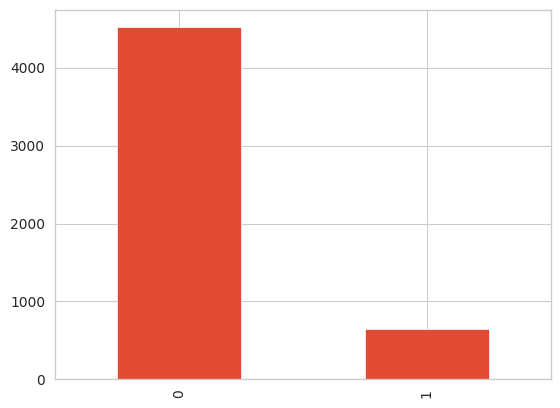

In [17]:
df['target'].value_counts().plot(kind='bar')

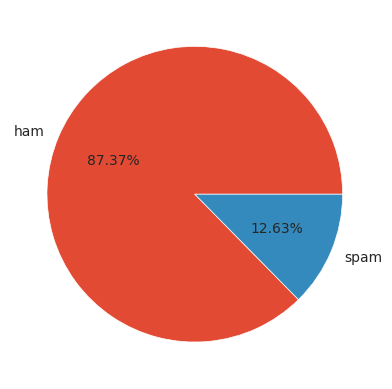

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

In [19]:
df['characters']=df['message'].apply(len)
df['words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df

,target,message,characters,words,sentences
0,0,"go until jurong point, crazy.. available only ...",111,24,1
1,0,ok lar... joking wif u oni...,29,8,1
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,36,1
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,will ì_ b going to esplanade fr home?,37,9,1
5569,0,"pity, * was in mood for that. so...any other s...",57,15,2
5570,0,the guy did some bitching but i acted like i'd...,125,27,1


In [21]:
df[["characters","words","sentences"]].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.426001,1.887019
std,58.236293,13.286437,1.374667
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,216.000000,34.000000


In [22]:
df[df['target']==0][["characters","words","sentences"]].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.108282,1.748893
std,56.358207,13.464872,1.309920
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,216.000000,34.000000


In [23]:
df[df['target']==1][["characters","words","sentences"]].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.539051,2.842266
std,30.137753,6.967305,1.431864
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

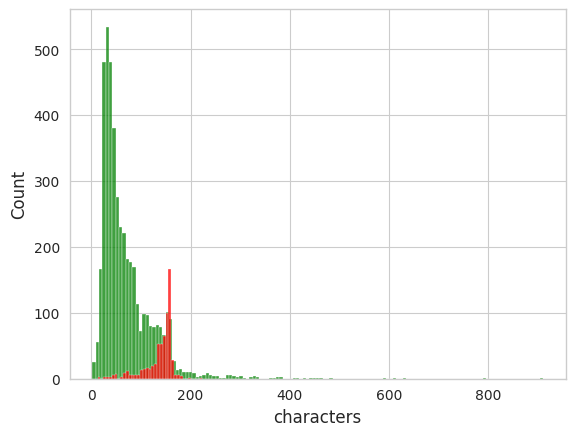

In [24]:
sns.histplot(df[df['target']==0]['characters'],color='green')
sns.histplot(df[df['target']==1]['characters'],color='red')

<Axes: xlabel='sentences', ylabel='Count'>

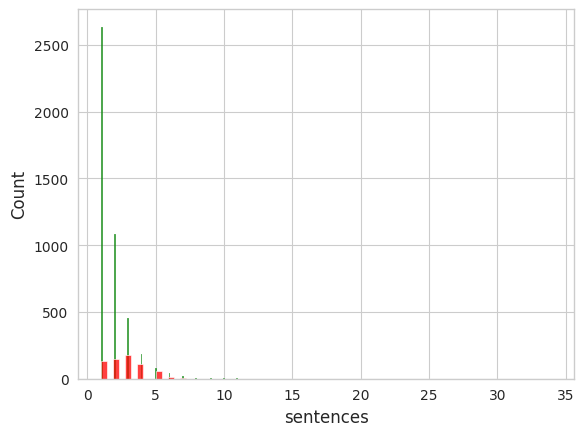

In [25]:
sns.histplot(df[df['target']==0]['sentences'],color='green')
sns.histplot(df[df['target']==1]['sentences'],color='red')

<Axes: xlabel='words', ylabel='Count'>

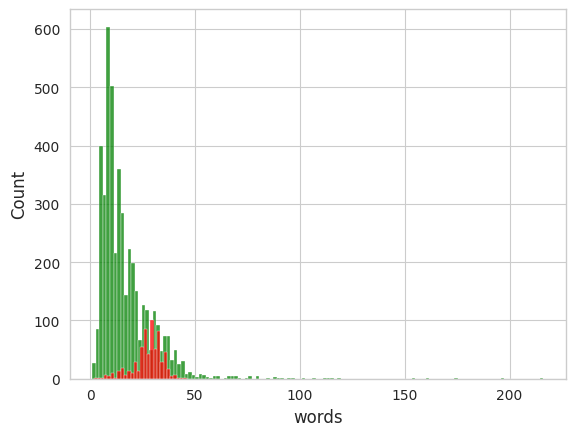

In [26]:
sns.histplot(df[df['target']==0]['words'],color='green')
sns.histplot(df[df['target']==1]['words'],color='red')

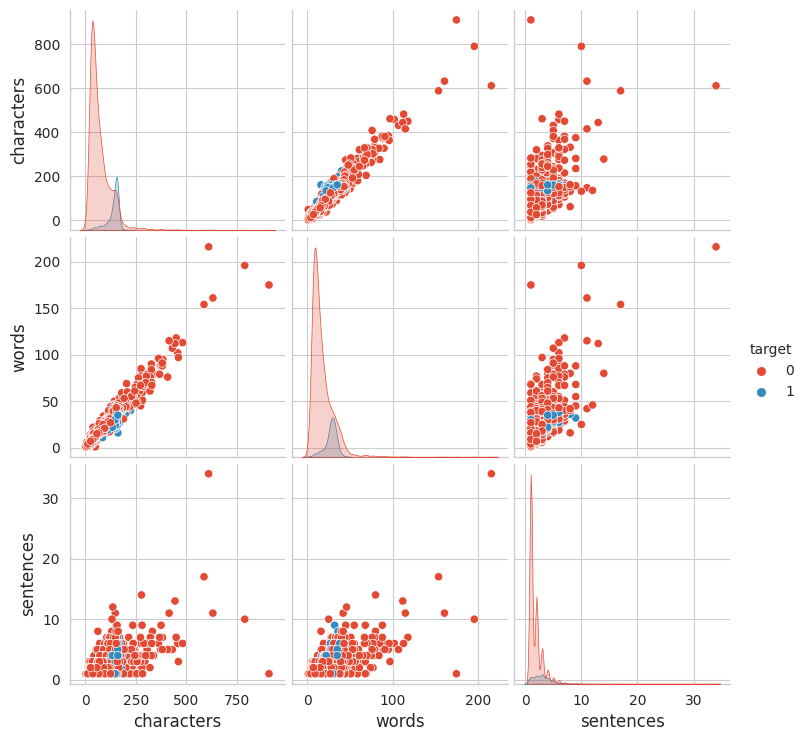

In [27]:
sns.pairplot(df,hue='target')

<Axes: >

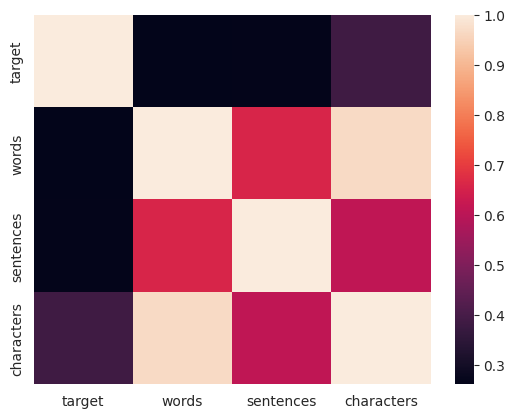

In [28]:
sns.heatmap(df[['target','words','sentences','characters']].corr())


In [29]:
!pip install nltk==3.2.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367707 sha256=1f445006d6cb8612b6a1c81bc056920758c3c84ba3fa78a4a6f224e0a399f46a
  Stored in directory: /root/.cache/pip/wheels/0e/8c/42/bcd0934b61ecf4cef964ccc9881888cca0841ec72266e99de1
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [30]:
nlp = spacy.load('en_core_web_sm')

def lemmatize(word):
    doc=nlp(word)
    for token in doc:
        return token.lemma_

In [31]:
def preprocess(text):
    import string


    text=text.lower()
    text=nltk.word_tokenize(text)
    text=[lemmatize(word) for word in text if word not in nltk.corpus.stopwords.words('english')]
    text=[word for word in text if word not in string.punctuation]
    text=[word for word in text if word.isalnum()]
    text=' '.join(text)
    return text


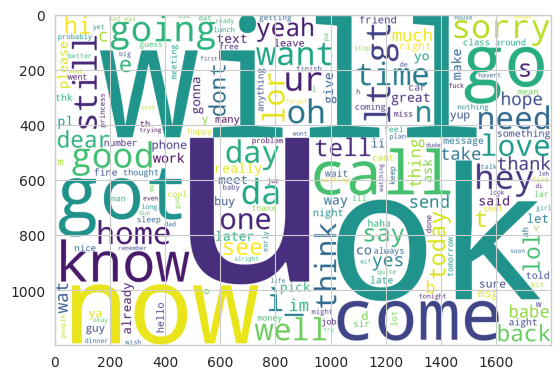

In [33]:
wordcloud=WordCloud(width=1800,height=1200,background_color='white',min_font_size=10)
plt.imshow(wordcloud.generate(df[df['target']==0]['message'].to_string()))

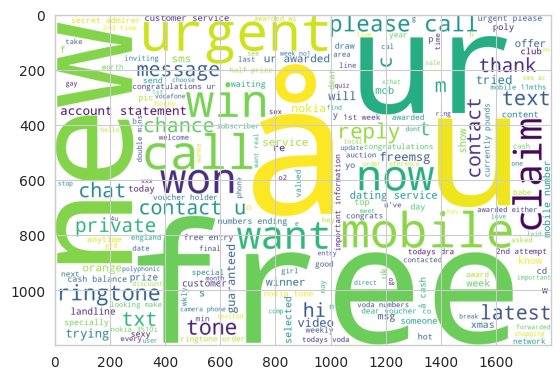

In [34]:
wordcloud=WordCloud(width=1800,height=1200,background_color='white',min_font_size=10)
plt.imshow(wordcloud.generate(df[df['target']==1]['message'].to_string()))